In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3X + noise

#### Splitting the Data Points

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Simple Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

#### Metrics

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Metrics:")
print(f"  MSE: {mse:.3f}")
print(f"  RMSE: {rmse:.3f}")
print(f"  MAE: {mae:.3f}")
print(f"  R2 Score: {r2:.3f}")

Linear Regression Metrics:
  MSE: 0.654
  RMSE: 0.809
  MAE: 0.591
  R2 Score: 0.807


#### Ridge Regression

In [6]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)

In [7]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)
best_ridge = ridge_cv.best_estimator_
print(f"Best Ridge Alpha: {ridge_cv.best_params_['alpha']}")

Best Ridge Alpha: 1


#### Lasso Regression

In [8]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)

In [9]:
# Hyperparameter tuning using GridSearchCV
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)
best_lasso = lasso_cv.best_estimator_
print(f"Best Lasso Alpha: {lasso_cv.best_params_['alpha']}")

Best Lasso Alpha: 0.1


#### Comparing Different Regression Models

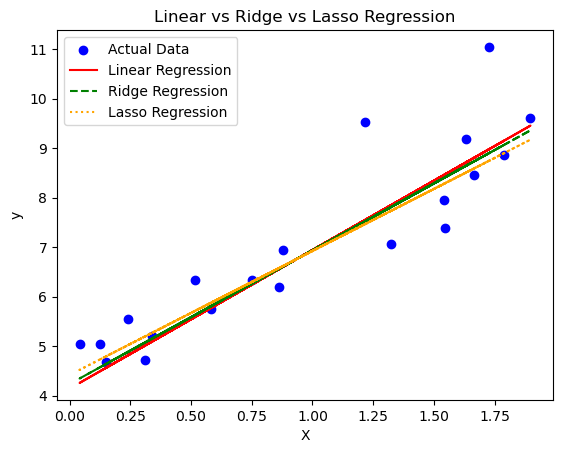

In [10]:
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X_test, y_pred, color='red', label="Linear Regression")
plt.plot(X_test, ridge_pred, color='green', linestyle="dashed", label="Ridge Regression")
plt.plot(X_test, lasso_pred, color='orange', linestyle="dotted", label="Lasso Regression")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear vs Ridge vs Lasso Regression")
plt.show()